In [ ]:
### Importing Neccessary Packages for Python- For Web browsing simulation and Reviews Scraping

In [1]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [3]:
# ✅ Step 1: Import necessary packages
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time

# ✅ Step 2: Ask for the Flipkart product review URL
flipkart_url = input("Enter Flipkart product review page URL:\n")

# ✅ Path to your local chromedriver.exe (adjust this path as per your PC)
chromedriver_path = "C:/WebDriver/chromedriver.exe"  # Updated this to my local drive directory

# ✅ Setup Chrome options (open visible browser)
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")  # Optional: start maximized
options.add_argument("--disable-notifications")  # Prevent popups
options.add_experimental_option("detach", True)  # Keep Chrome open after script ends (optional)

# ✅ Launch Chrome browser with Selenium
driver = webdriver.Chrome(service=Service(chromedriver_path), options=options)

# ✅ Navigate to the user-provided Flipkart URL
print("\n🌐 Opening page...")
driver.get(flipkart_url)

# ✅ Wait for page to load
time.sleep(3)

# ✅ Confirm by printing the title
print("✅ Page loaded!")
print("📝 Page Title:", driver.title)

Enter Flipkart product review page URL:
 https://www.flipkart.com/samsung-galaxy-f05-twilight-blue-64-gb/product-reviews/itm84a914081ab93?pid=MOBH4GTXZ9ZRQ3SU&lid=LSTMOBH4GTXZ9ZRQ3SUTOKMZJ&marketplace=FLIPKART



🌐 Opening page...
✅ Page loaded!
📝 Page Title: Samsung Galaxy F05 Twilight Blue 64 Gb Reviews: Latest Review of Samsung Galaxy F05 Twilight Blue 64 Gb | Price in India | Flipkart.com


In [ ]:
### Web Scraping for 50 reviews on opened Flipkart URL

In [5]:
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
import time

# ✅ Initialize
all_reviews = []
REVIEW_TARGET = 50
page = 1

print("\n🔁 Starting review scraping...\n")

while len(all_reviews) < REVIEW_TARGET:
    time.sleep(3)  # Let the page load completely

    # ✅ Find all review blocks
    review_blocks = driver.find_elements(By.CLASS_NAME, "ZmyHeo")

    for block in review_blocks:
        try:
            # Extract the inner review text
            review_text = block.find_element(By.TAG_NAME, 'div').text.strip()
            if review_text:
                all_reviews.append(review_text)
                if len(all_reviews) >= REVIEW_TARGET:
                    break
        except:
            continue

    print(f"✅ Collected {len(all_reviews)} reviews so far...")

    if len(all_reviews) >= REVIEW_TARGET:
        break

    # ✅ Click the "Next" button to go to the next review page
    try:
        next_button = driver.find_element(By.XPATH, '//span[text()="Next"]')
        driver.execute_script("arguments[0].click();", next_button)  # JS click to avoid intercepts
        page += 1
        print(f"➡️ Moving to page {page}...\n")
    except (NoSuchElementException, ElementClickInterceptedException):
        print("❌ 'Next' button not found or not clickable. Ending scraping.")
        break

print(f"\n🎯 Finished scraping {len(all_reviews)} reviews!\n")



🔁 Starting review scraping...

✅ Collected 10 reviews so far...
➡️ Moving to page 2...

✅ Collected 20 reviews so far...
➡️ Moving to page 3...

✅ Collected 30 reviews so far...
➡️ Moving to page 4...

✅ Collected 40 reviews so far...
➡️ Moving to page 5...

✅ Collected 50 reviews so far...

🎯 Finished scraping 50 reviews!



In [ ]:
#### Checking reviews if they have been scraped or not

In [7]:
for i, review in enumerate(all_reviews[:20], start=1):
    print(f"Review {i}:\n{review}\n{'-'*60}")

Review 1:
Nice phone
------------------------------------------------------------
Review 2:
Phone looks is very nice, but one thing Phone Charger is necessary, but nowadays Samsung is not provide a charger, its unfair.
------------------------------------------------------------
Review 3:
Nice phone and amazing look and UI
------------------------------------------------------------
Review 4:
Awesome thanks to flipkart
------------------------------------------------------------
Review 5:
Good product ❤️
------------------------------------------------------------
Review 6:
Superb mobile . Performance and camera quality is awesome . I have noticed only drawback in the box not in the adapter for charging . Its must buy us.
------------------------------------------------------------
Review 7:
Nice product
------------------------------------------------------------
Review 8:
Camera 📸 quality,👌
------------------------------------------------------------
Review 9:
Mobile was ok at this p

In [ ]:
### Bringing in the VADER Lexicons and initialising them:

In [9]:
# Install VADER if not already installed
!pip install vaderSentiment

# Import
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize analyzer
analyzer = SentimentIntensityAnalyzer()

In [11]:
# Storage for results
sentiment_results = []

print("🔍 Starting sentiment analysis...\n")

for i, review in enumerate(all_reviews, start=1):
    scores = analyzer.polarity_scores(review)
    compound = scores['compound']

    # Classify based on compound score
    if compound >= 0.05:
        label = 'Positive'
    elif compound <= -0.05:
        label = 'Negative'
    else:
        label = 'Neutral'

    sentiment_results.append({
        'Review': review,
        'Compound Score': compound,
        'Sentiment': label
    })

    # Print first few for inspection
    if i <= 20:
        print(f"Review {i}: {review}")
        print(f"Score: {compound} → Sentiment: {label}")
        print('-'*80)

print(f"\n✅ Analysis complete. Processed {len(sentiment_results)} reviews.")

🔍 Starting sentiment analysis...

Review 1: Nice phone
Score: 0.4215 → Sentiment: Positive
--------------------------------------------------------------------------------
Review 2: Phone looks is very nice, but one thing Phone Charger is necessary, but nowadays Samsung is not provide a charger, its unfair.
Score: -0.4773 → Sentiment: Negative
--------------------------------------------------------------------------------
Review 3: Nice phone and amazing look and UI
Score: 0.765 → Sentiment: Positive
--------------------------------------------------------------------------------
Review 4: Awesome thanks to flipkart
Score: 0.7906 → Sentiment: Positive
--------------------------------------------------------------------------------
Review 5: Good product ❤️
Score: 0.4404 → Sentiment: Positive
--------------------------------------------------------------------------------
Review 6: Superb mobile . Performance and camera quality is awesome . I have noticed only drawback in the box not i

In [ ]:
### Now Analysing the Most fequently used Words in all the 100 reviews collected.

## Via Wordcloud plotting using Wordcloud Package

In [13]:
!pip install wordcloud

C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


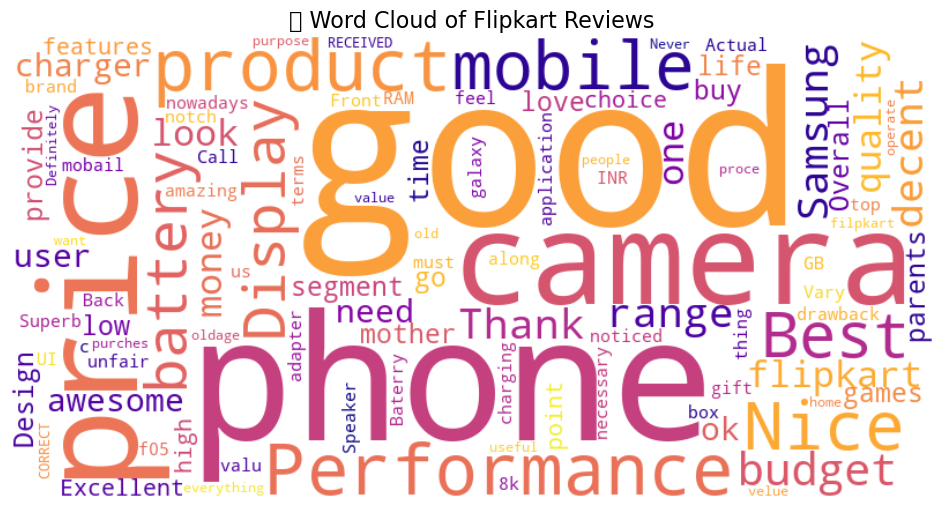

In [15]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all reviews into one long string
text_blob = " ".join(all_reviews)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma',
                      max_words=100, collocations=False).generate(text_blob)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("🌀 Word Cloud of Flipkart Reviews", fontsize=16)
plt.show()


In [ ]:
### Now I will plot a bar Chart to observe the number of Positive , Negative and Neutral comments we have gotten
### in the first 100 reviews 

C:\Users\abmag\AppData\Local\Temp\ipykernel_23152\465471204.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


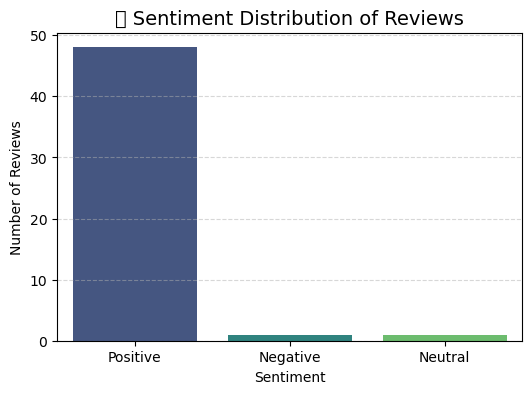

In [17]:
import pandas as pd
import seaborn as sns

# Convert sentiment results to a DataFrame
df = pd.DataFrame(sentiment_results)

# Count sentiments
sentiment_counts = df['Sentiment'].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title("📊 Sentiment Distribution of Reviews", fontsize=14)
plt.ylabel("Number of Reviews")
plt.xlabel("Sentiment")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
### Saving the reviews and collected sentiments in a file on local Disk

In [ ]:

# Convert the list of dicts to a DataFrame
df = pd.DataFrame(sentiment_results)

# Save to CSV file (update file path if needed)
output_path = 'D:/Rishi/JINDAL Academics/Corporate Project/Dataset/Sentiment Analysis Flipkart/flipkart_reviews_sentiment.csv'
df.to_csv(output_path, index=False)

print(f" File saved successfully: {output_path}")